https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Thailand

In [1]:
pre_volume_NE=[]
pre_volume_NW=[]
pre_volume_SE=[]
pre_volume_SW=[]

in_volume_NE=[]
in_volume_NW=[]
in_volume_SE=[]
in_volume_SW=[]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob, re, h5py

def load_h5_file(filename):
    with h5py.File(filename) as fr:
        return np.array(fr.get("array"))


In [3]:
from utils.date_util import generate_date_range

BASE_FOLDER = "./raw"

pre_covid_range = generate_date_range("2019-03-10", "2019-04-10")
in_covid_range = generate_date_range("2020-03-10", "2020-04-10")

In [4]:
# get volume per day and get average of 5min

for pre_date in pre_covid_range:
    data = load_h5_file(f"{BASE_FOLDER}/BANGKOK/{pre_date}_BANGKOK_8ch.h5")
    pre_volume_NE.append(np.sum(data[:,:,:,0])/288)
    pre_volume_NW.append(np.sum(data[:,:,:,2])/288)
    pre_volume_SE.append(np.sum(data[:,:,:,4])/288)
    pre_volume_SW.append(np.sum(data[:,:,:,6])/288)
    
for in_date in in_covid_range:
    data = load_h5_file(f"{BASE_FOLDER}/BANGKOK/{in_date}_BANGKOK_8ch.h5")
    in_volume_NE.append(np.sum(data[:,:,:,0])/288)
    in_volume_NW.append(np.sum(data[:,:,:,2])/288)
    in_volume_SE.append(np.sum(data[:,:,:,4])/288)
    in_volume_SW.append(np.sum(data[:,:,:,6])/288)
 
 


In [5]:
dates = []
for i in pre_covid_range:
    dates.append(i[5:])
    

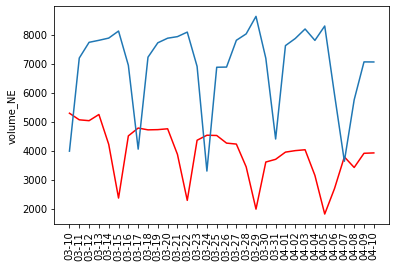

In [6]:
plt.plot(in_volume_NE,"r", pre_volume_NE)
plt.ylabel('volume_NE')
plt.xticks(np.arange(32),dates,rotation=90)
plt.rcParams["figure.figsize"] = (30,14)
plt.show()

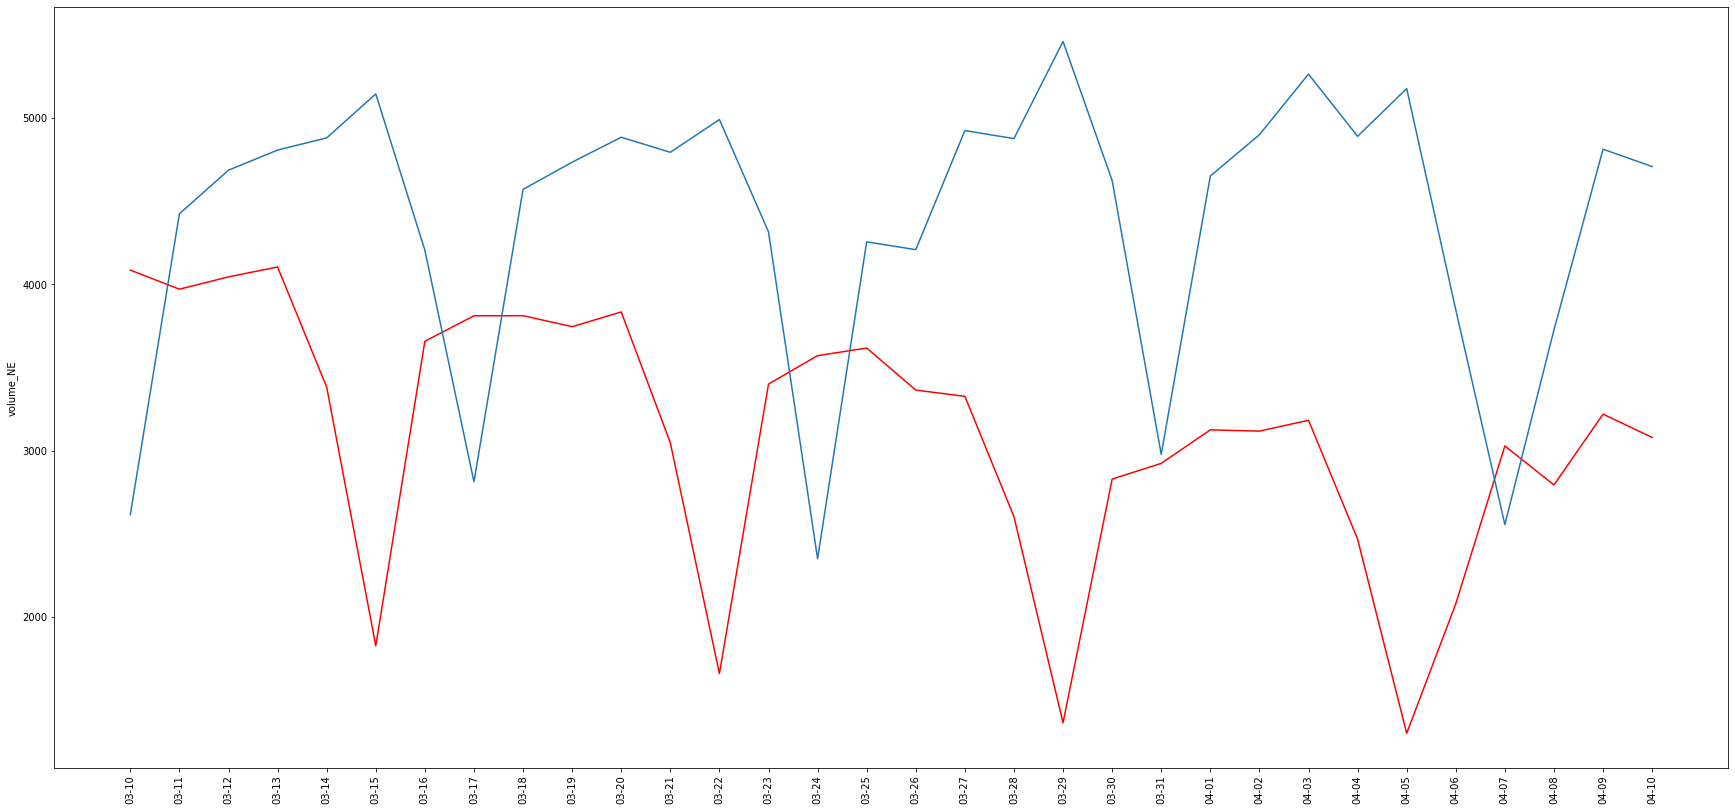

In [7]:
plt.plot(in_volume_NW,"r", pre_volume_NW)
plt.ylabel('volume_NE')
plt.xticks(np.arange(32),dates,rotation=90)
plt.rcParams["figure.figsize"] = (30,14)
plt.show()

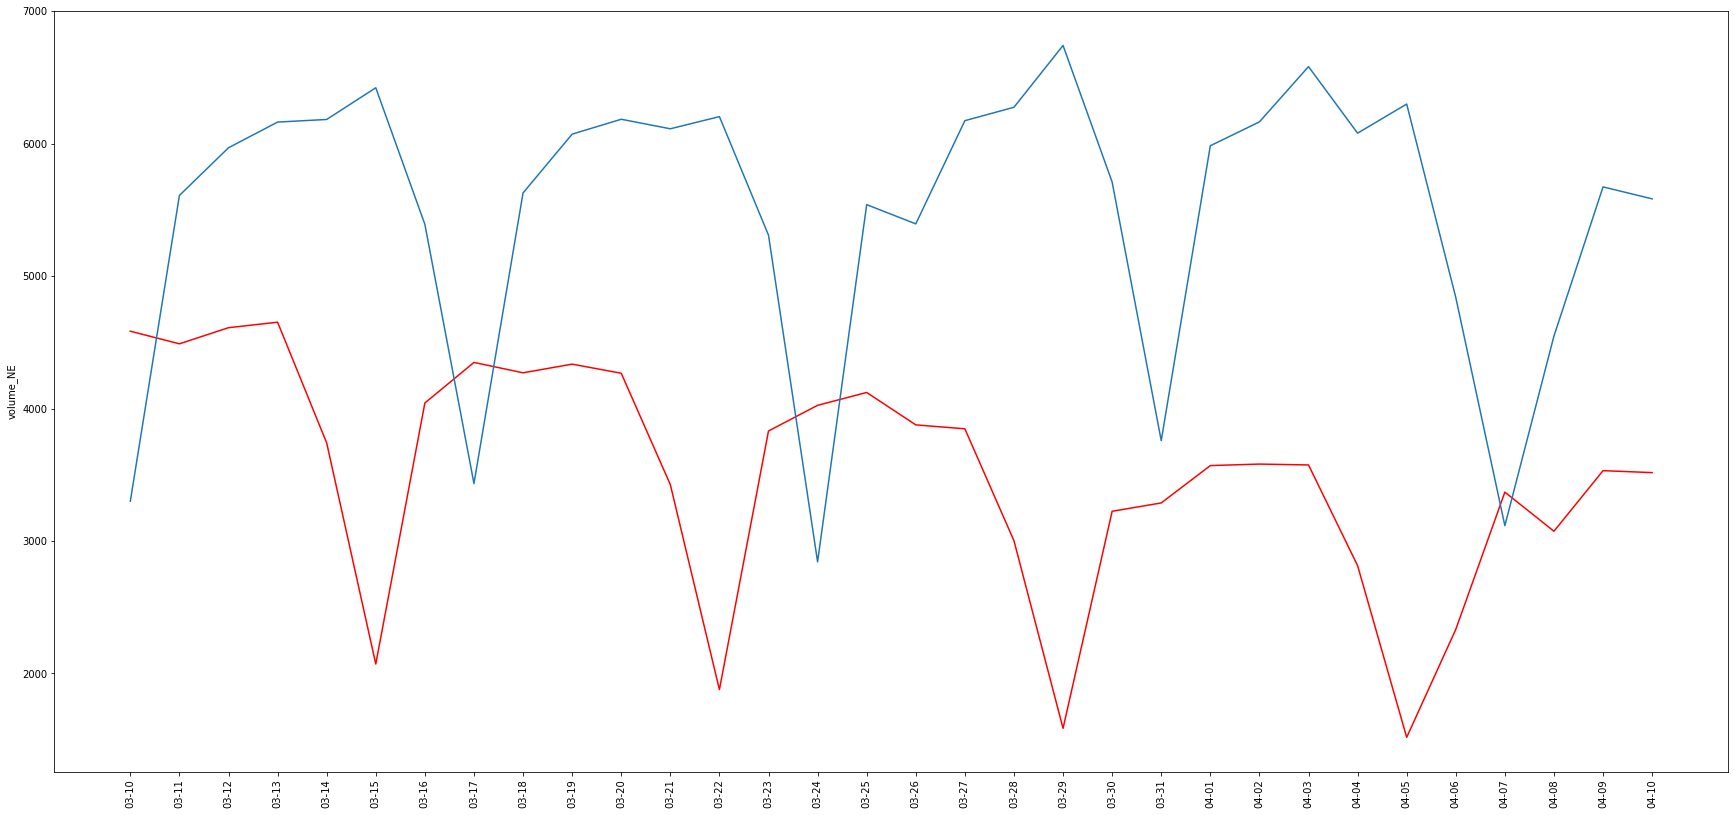

In [8]:
plt.plot(in_volume_SE,"r", pre_volume_SE)
plt.ylabel('volume_NE')
plt.xticks(np.arange(32),dates,rotation=90)
plt.rcParams["figure.figsize"] = (30,14)
plt.show()

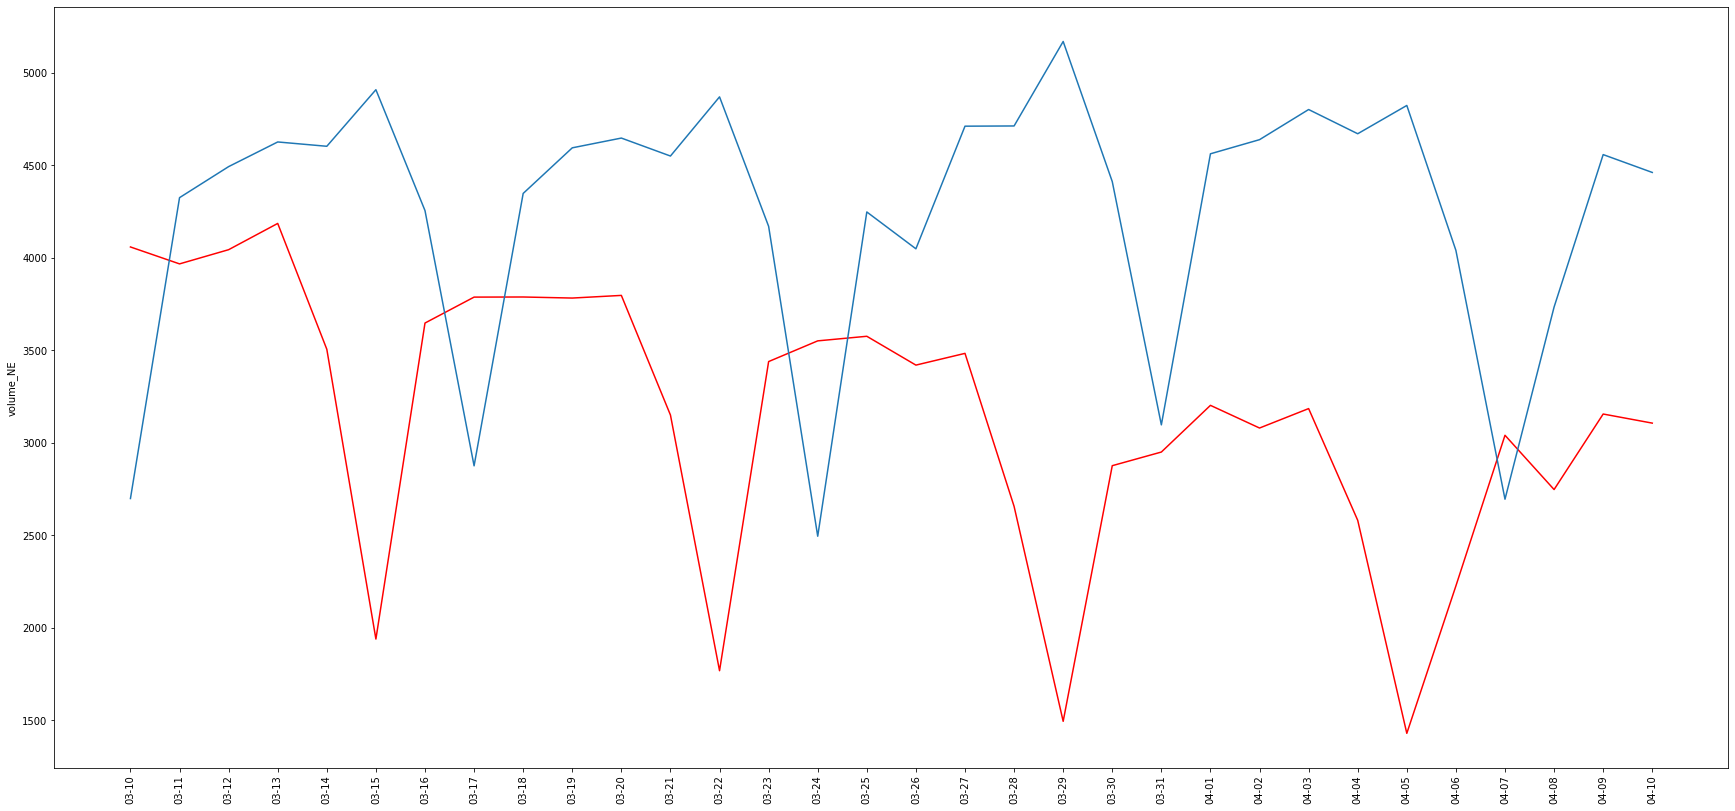

In [9]:
plt.plot(in_volume_SW,"r", pre_volume_SW)
plt.ylabel('volume_NE')
plt.xticks(np.arange(32),dates,rotation=90)
plt.rcParams["figure.figsize"] = (30,14)
plt.show()

In [19]:
# overpass admin_levels 4 6
pre_volume = []
in_volume = []
for i in range(32):
    pre_volume.append(pre_volume_NE[i]+pre_volume_NW[i]+pre_volume_SE[i]+pre_volume_SW[i])
    in_volume.append(in_volume_NE[i]+in_volume_NW[i]+in_volume_SE[i]+in_volume_SW[i])


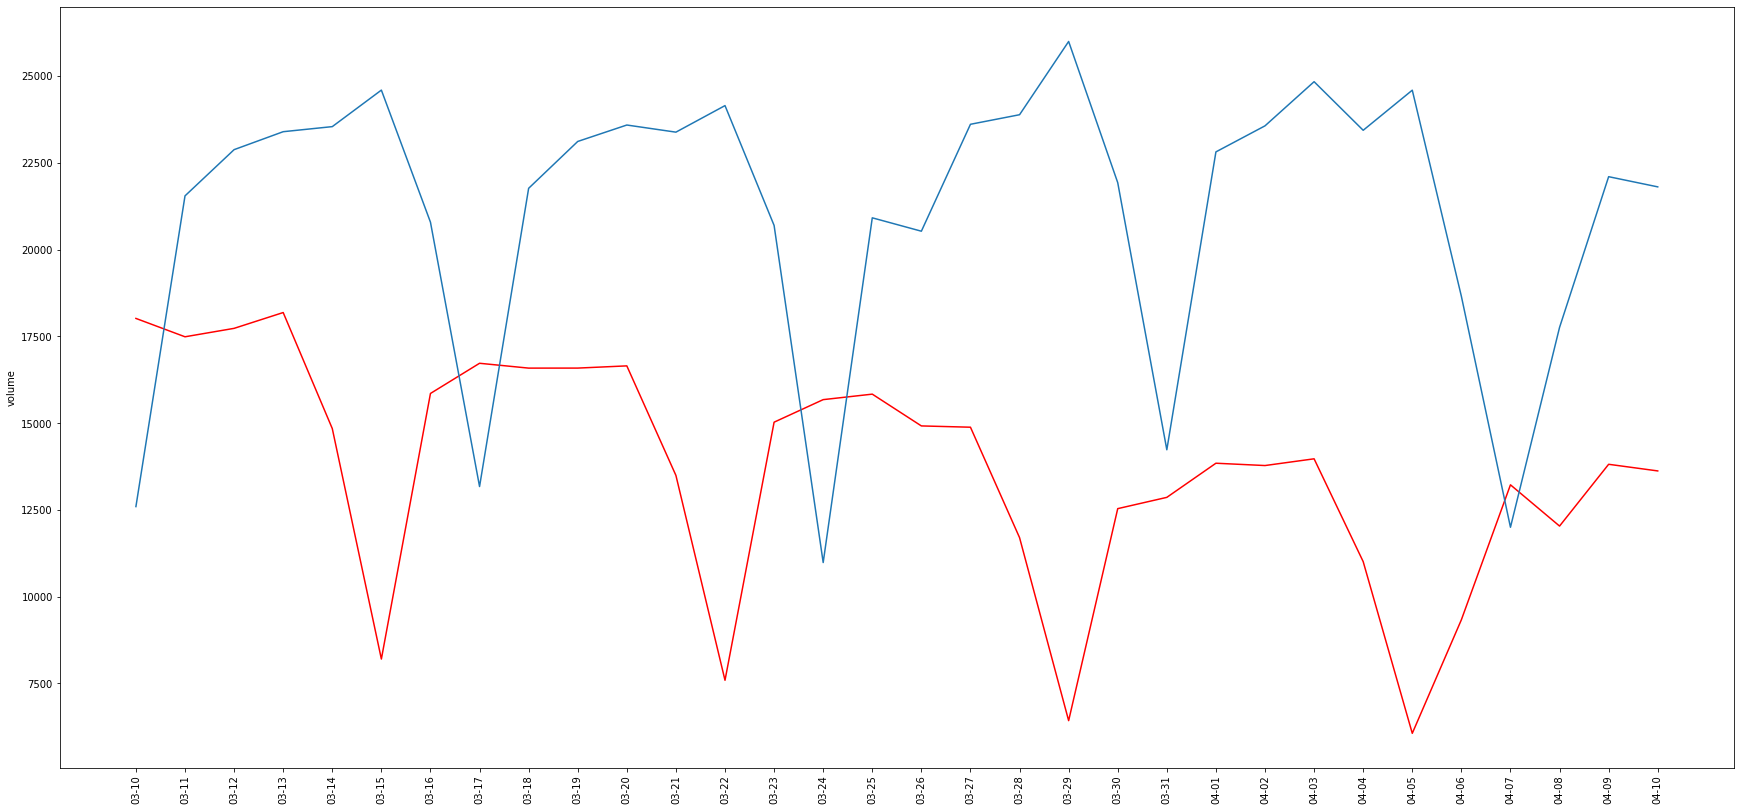

In [20]:
plt.plot(in_volume,"r", pre_volume)
plt.ylabel('volume')
plt.xticks(np.arange(32),dates,rotation=90)
plt.rcParams["figure.figsize"] = (30,14)
plt.show()